# Import Libraries

In [1]:
import datetime as dt
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

#import tick customization tools
import matplotlib.ticker as mticks
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter

plt.style.use(['ggplot'])

In [2]:
# load data 
url = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQN3Ksa9szQuO4G1-msXWAp17KtVHQCBnuEieu_auu1wSiBf3-krHusIx5VBMkihxj-KZLBosDIGEyR/pub?output=csv'
df = pd.read_csv(url)
df.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0
4,6915,4,San Antonio,city,TX,TX,"San Antonio-New Braunfels, TX",Bexar County,114794.0,114975.0,...,269323.0,274032.0,278464.0,284127.0,289739.0,294776.0,297727.0,298796.0,299124.0,298951.0


# Part 1

In [3]:
# explore SizeRank column
df['SizeRank'].unique()

array([    0,     1,     2, ..., 28413, 28415, 28439], dtype=int64)

In [4]:
#filter 4 largest cities
largest_cities4 = df.loc[df['SizeRank']<4]
largest_cities4

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,2000-01-31,2000-02-29,...,2021-12-31,2022-01-31,2022-02-28,2022-03-31,2022-04-30,2022-05-31,2022-06-30,2022-07-31,2022-08-31,2022-09-30
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0,255517.0,...,741586.0,745686.0,750578.0,756734.0,762321.0,768797.0,773944.0,777692.0,779960.0,781622.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0,234401.0,...,924019.0,928991.0,937936.0,953874.0,973168.0,990391.0,992337.0,992630.0,978196.0,966595.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0,109079.0,...,245783.0,248718.0,252080.0,256435.0,261101.0,265558.0,268901.0,271059.0,272400.0,272639.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0,166536.0,...,302821.0,305104.0,306404.0,308303.0,309649.0,312487.0,314663.0,315910.0,315587.0,315429.0


In [5]:
#Melt the data 
largest_cities4_melted =  pd.melt(largest_cities4, 
        id_vars = ['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'Metro', 'CountyName'],
       value_name='Price',var_name="Date")

In [6]:
largest_cities4_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   RegionID    1092 non-null   int64  
 1   SizeRank    1092 non-null   int64  
 2   RegionName  1092 non-null   object 
 3   RegionType  1092 non-null   object 
 4   StateName   1092 non-null   object 
 5   State       1092 non-null   object 
 6   Metro       1092 non-null   object 
 7   CountyName  1092 non-null   object 
 8   Date        1092 non-null   object 
 9   Price       1087 non-null   float64
dtypes: float64(1), int64(2), object(7)
memory usage: 85.4+ KB


In [7]:
#Convert months into the datetime index
largest_cities4_melted['Date'] = pd.to_datetime(largest_cities4_melted['Date'])
largest_cities4_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Date,Price
0,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-01-31,253690.0
1,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,2000-01-31,234181.0
2,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,2000-01-31,109068.0
3,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,2000-01-31,166139.0
4,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,2000-02-29,255517.0


In [8]:
largest_cities4_melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   RegionID    1092 non-null   int64         
 1   SizeRank    1092 non-null   int64         
 2   RegionName  1092 non-null   object        
 3   RegionType  1092 non-null   object        
 4   StateName   1092 non-null   object        
 5   State       1092 non-null   object        
 6   Metro       1092 non-null   object        
 7   CountyName  1092 non-null   object        
 8   Date        1092 non-null   datetime64[ns]
 9   Price       1087 non-null   float64       
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 85.4+ KB


In [9]:
#make Date column as index
largest_cities4_melted = largest_cities4_melted.set_index('Date')
largest_cities4_melted.head()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,Metro,CountyName,Price
Date,,,,,,,,,
2000-01-31,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,253690.0
2000-01-31,12447,1,Los Angeles,city,CA,CA,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,234181.0
2000-01-31,39051,2,Houston,city,TX,TX,"Houston-The Woodlands-Sugar Land, TX",Harris County,109068.0
2000-01-31,17426,3,Chicago,city,IL,IL,"Chicago-Naperville-Elgin, IL-IN-WI",Cook County,166139.0
2000-02-29,6181,0,New York,city,NY,NY,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,255517.0


In [10]:
# Resample the dataframe in Months, grouped by City
df_ts = largest_cities4_melted.groupby('RegionName').resample('M').mean()
df_ts

C:\Users\sheha\AppData\Local\Temp\ipykernel_7492\1095064975.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = largest_cities4_melted.groupby('RegionName').resample('M').mean()
C:\Users\sheha\AppData\Local\Temp\ipykernel_7492\1095064975.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_ts = largest_cities4_melted.groupby('RegionName').resample('M').mean()
C:\Users\sheha\AppData\Local\Temp\ipykernel_7492\1095064975.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or

RegionID  SizeRank     Price
RegionName Date                                    
Chicago    2000-01-31   17426.0       3.0  166139.0
           2000-02-29   17426.0       3.0  166536.0
           2000-03-31   17426.0       3.0  167368.0
           2000-04-30   17426.0       3.0  168826.0
           2000-05-31   17426.0       3.0  170499.0
...                         ...       ...       ...
New York   2022-05-31    6181.0       0.0  768797.0
           2022-06-30    6181.0       0.0  773944.0
           2022-07-31    6181.0       0.0  777692.0
           2022-08-31    6181.0       0.0  779960.0
           2022-09-30    6181.0       0.0  781622.0

[1092 rows x 3 columns]

In [11]:
#drop unwanted columns
df_ts.drop(columns = ['RegionID', 'SizeRank'], inplace = True)
df_ts

Price
RegionName Date                
Chicago    2000-01-31  166139.0
           2000-02-29  166536.0
           2000-03-31  167368.0
           2000-04-30  168826.0
           2000-05-31  170499.0
...                         ...
New York   2022-05-31  768797.0
           2022-06-30  773944.0
           2022-07-31  777692.0
           2022-08-31  779960.0
           2022-09-30  781622.0

[1092 rows x 1 columns]

# Part 2

In [12]:
#unstack dataframe
df_ts_unstack = df_ts.unstack(0)
df_ts_unstack

Price                                
RegionName   Chicago   Houston Los Angeles  New York
Date                                                
2000-01-31  166139.0  109068.0    234181.0  253690.0
2000-02-29  166536.0  109079.0    234401.0  255517.0
2000-03-31  167368.0  108878.0    235513.0  257207.0
2000-04-30  168826.0  108881.0    237589.0  260310.0
2000-05-31  170499.0  108834.0    240113.0  263204.0
...              ...       ...         ...       ...
2022-05-31  312487.0  265558.0    990391.0  768797.0
2022-06-30  314663.0  268901.0    992337.0  773944.0
2022-07-31  315910.0  271059.0    992630.0  777692.0
2022-08-31  315587.0  272400.0    978196.0  779960.0
2022-09-30  315429.0  272639.0    966595.0  781622.0

[273 rows x 4 columns]

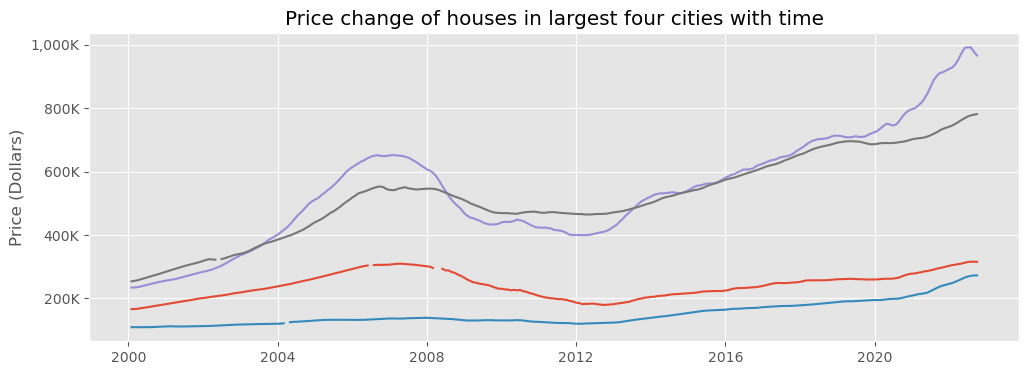

In [13]:
#plot data
fig, ax = plt.subplots(figsize=(12,4))
ax.plot(df_ts_unstack)
ax.set(title = 'Price change of houses in largest four cities with time',
      ylabel = 'Price (Dollars)')


fmt_yaxis = FuncFormatter((lambda y,p : format(int(y/1000), ',')+ 'K'))
ax.yaxis.set_major_formatter(fmt_yaxis)


# Questions
1) Which City had the highest Typical Home Value at the end of 2008? Which had the least?

In [14]:
#maximum price of each city
price_2008 = df_ts_unstack.loc['12-2008','Price']
price_2008

RegionName,Chicago,Houston,Los Angeles,New York
Date,,,,
2008-12-31,265306.0,131283.0,469294.0,510309.0


New York had the highest Typical Home Value at the end of 2008 while Houston had the least

2) How much did the home values change from November 2008 to December 2008 (in dollars)?

In [16]:
difference = df_ts_unstack.loc['2008-11':'2008-12', ('Price')].diff()
difference = difference.T
difference.drop(columns = '	2008-11-30', inplace =True)
difference

Date,2008-12-31
RegionName,
Chicago,-5753.0
Houston,-964.0
Los Angeles,-12611.0
New York,-4458.0


The difference of house prices are as above for each city in dollars 